In [164]:
import os
import json
import numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
os.listdir(".")

['ra-post-velocity.json',
 'velocity_from_scratch.ipynb',
 'ra-pre-velocity.json',
 '.ipynb_checkpoints',
 'velocity.csv',
 'unspliced.txt',
 'spliced.txt',
 'S_norm.txt']

In [183]:
with open("velocity.csv") as f:
    v = numpy.loadtxt(f)
    v = v.T

with open("spliced.txt") as f:
    s = numpy.loadtxt(f)

with open("unspliced.txt") as f:
    u = numpy.loadtxt(f)

In [184]:
with open("S_norm.txt") as f:
    S_norm = numpy.loadtxt(f)
    S_norm = S_norm.T

In [219]:
with open("Sx_sz") as f:
    Sx_sz = numpy.loadtxt(f)
    Sx_sz = Sx_sz.T

In [220]:
Sx_sz.shape

(2104, 1954)

In [239]:
v.shape

(2104, 1954)

In [16]:
s.shape

(11082, 2104)

In [17]:
u.shape

(11082, 2104)

In [40]:
with open("ra-pre-velocity.json") as f:
    ra_before = json.load(f)

In [41]:
with open("ra-post-velocity.json") as f:
    ra_after = json.load(f)

In [42]:
[key for key in ra_before]

['Accession', 'Chromosome', 'End', 'Gene', 'Start', 'Strand']

In [54]:
mapping = {j:i for i, j in enumerate(ra_before["Accession"])}

In [55]:
len(ra_before["Accession"])

11082

In [56]:
len(ra_before["Gene"])

11082

In [57]:
len(ra_after["Gene"])

1954

In [58]:
mapping

{'ENSG00000188976': 0,
 'ENSG00000131591': 1,
 'ENSG00000078808': 2,
 'ENSG00000160087': 3,
 'ENSG00000131584': 4,
 'ENSG00000127054': 5,
 'ENSG00000107404': 6,
 'ENSG00000175756': 7,
 'ENSG00000221978': 8,
 'ENSG00000242485': 9,
 'ENSG00000160075': 10,
 'ENSG00000228594': 11,
 'ENSG00000248333': 12,
 'ENSG00000008128': 13,
 'ENSG00000008130': 14,
 'ENSG00000078369': 15,
 'ENSG00000162585': 16,
 'ENSG00000157911': 17,
 'ENSG00000157881': 18,
 'ENSG00000116213': 19,
 'ENSG00000130764': 20,
 'ENSG00000116198': 21,
 'ENSG00000198912': 22,
 'ENSG00000131697': 23,
 'ENSG00000116251': 24,
 'ENSG00000116237': 25,
 'ENSG00000097021': 26,
 'ENSG00000162408': 27,
 'ENSG00000162413': 28,
 'ENSG00000007923': 29,
 'ENSG00000049249': 30,
 'ENSG00000116285': 31,
 'ENSG00000142599': 32,
 'ENSG00000074800': 33,
 'ENSG00000180758': 34,
 'ENSG00000228526': 35,
 'ENSG00000231789': 36,
 'ENSG00000171603': 37,
 'ENSG00000178585': 38,
 'ENSG00000162441': 39,
 'ENSG00000160049': 40,
 'ENSG00000116649': 41,
 '

In [59]:
ra_after["Gene"]

['INTS11',
 'CDK11B',
 'ERRFI1',
 'EXOSC10',
 'SDHB',
 'DDOST',
 'HNRNPR',
 'TCEA3',
 'GALE',
 'SRSF10',
 'STMN1',
 'TAF12',
 'PSMB2',
 'CLSPN',
 'MRPS15',
 'SNIP1',
 'TRIT1',
 'EBNA1BP2',
 'KDM4A-AS1',
 'EIF2B3',
 'PRDX1',
 'STIL',
 'NRDC',
 'TXNDC12',
 'MAGOH',
 'HSPB11',
 'TMEM59',
 'TM2D1',
 'JAK1',
 'DEPDC1',
 'LRRC40',
 'ANKRD13C',
 'CRYZ',
 'USP33',
 'FUBP1',
 'GNG5',
 'C1orf52',
 'BCL10',
 'SELENOF',
 'GTF2B',
 'KYAT3',
 'DNTTIP2',
 'ARHGAP29',
 'SLC25A24',
 'PSRC1',
 'PSMA5',
 'LAMTOR5',
 'LRIF1',
 'DRAM2',
 'BCAS2',
 'CD58',
 'WARS2',
 'SEC22B',
 'ACP6',
 'SF3B4',
 'MTMR11',
 'ANP32E',
 'VPS72',
 'S100A10',
 'S100A11',
 'S100A4',
 'S100A2',
 'ILF2',
 'KRTCAP2',
 'SCAMP3',
 'IQGAP3',
 'TAGLN2',
 'TSTD1',
 'PFDN2',
 'ALDH9A1',
 'TMCO1',
 'MPC2',
 'NME7',
 'KIFAP3',
 'GAS5',
 'ACBD6',
 'ARPC5',
 'FAM129A',
 'TRMT1L',
 'UCHL5',
 'ASPM',
 'DENND1B',
 'KIF14',
 'DDX59',
 'UBE2T',
 'KDM5B',
 'GOLT1A',
 'NUAK2',
 'EIF2D',
 'NEK2',
 'ANGEL2',
 'GPATCH2',
 'EPRS',
 'DUSP10',
 'TP53BP2'

In [60]:
ra_before["Gene"]

['NOC2L',
 'C1orf159',
 'SDF4',
 'UBE2J2',
 'ACAP3',
 'INTS11',
 'DVL1',
 'AURKAIP1',
 'CCNL2',
 'MRPL20',
 'SSU72',
 'FNDC10',
 'CDK11B',
 'CDK11A',
 'NADK',
 'GNB1',
 'FAAP20',
 'PEX10',
 'PANK4',
 'WRAP73',
 'LRRC47',
 'CEP104',
 'C1orf174',
 'NPHP4',
 'RPL22',
 'ICMT',
 'ACOT7',
 'NOL9',
 'KLHL21',
 'DNAJC11',
 'TNFRSF9',
 'ERRFI1',
 'RERE',
 'ENO1',
 'GPR157',
 'MIR34AHG',
 'PIK3CD-AS2',
 'CLSTN1',
 'CTNNBIP1',
 'LZIC',
 'DFFA',
 'SRM',
 'EXOSC10',
 'MTOR',
 'MAD2L2',
 'MTHFR',
 'KIAA2013',
 'DHRS3',
 'CASP9',
 'UQCRHL',
 'AL450998.2',
 'ZBTB17',
 'EPHA2',
 'FBXO42',
 'NBPF1',
 'CROCCP2',
 'ATP13A2',
 'SDHB',
 'RCC2',
 'UBR4',
 'EMC1',
 'AKR7A2',
 'CAPZB',
 'TMCO4',
 'CAMK2N1',
 'MUL1',
 'DDOST',
 'SH2D5',
 'HP1BP3',
 'EIF4G3',
 'ECE1',
 'RAP1GAP',
 'USP48',
 'HSPG2',
 'LUZP1',
 'HNRNPR',
 'TCEA3',
 'ID3',
 'ELOA-AS1',
 'GALE',
 'HMGCL',
 'FUCA1',
 'SRSF10',
 'STPG1',
 'SYF2',
 'RSRP1',
 'STMN1',
 'PAFAH2',
 'UBXN11',
 'GPN2',
 'GPATCH3',
 'NR0B2',
 'WASF2',
 'AHDC1',
 'IFI6',
 'R

In [62]:
indices = []
for i, acc in enumerate(ra_after["Accession"]):
    if acc in mapping:
        indices.append(mapping[acc])

In [65]:
s.shape

(11082, 2104)

In [70]:
s_after = s[indices, ...]

In [76]:
u_after = u[indices, ...]

In [104]:
gene_count_after = s_after + u_after

In [105]:
gene_count_after = gene_count_after.T

In [107]:
gene_count_after.shape

(2104, 1954)

In [149]:
s_T = s.T

In [151]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X=s_T)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [156]:
s_reduced = pca.transform(s_T)

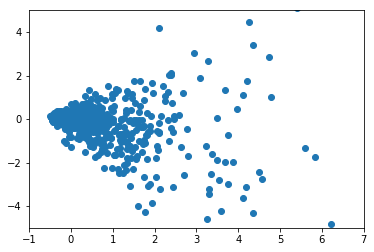

In [163]:
plt.ylim(-5, 5)
plt.xlim(-1, 7)
plt.scatter(s_reduced[:, 0], s_reduced[:, 1])

In [245]:
X = S_norm

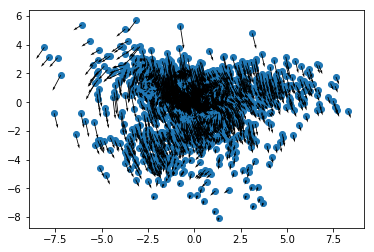

In [256]:
pca = PCA(n_components=2)
pca.fit(X=X)
pca.transform(X)
S_embedded = pca.transform(X)
plt.scatter(S_embedded[:, 0], S_embedded[:, 1]*-1)
plt.quiver(S_embedded[:, 0], S_embedded[:, 1]*-1, v[:, 0]*-1, v[:, 1], scale=1.5)

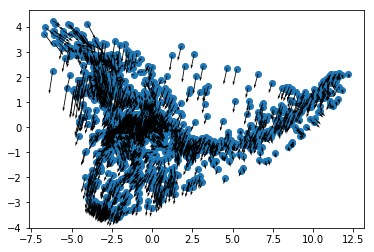

In [141]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X=gene_count_after)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [142]:
embedding = pca.transform(gene_count_after)

In [143]:
embedding.shape

(2104, 2)

In [144]:
embedding

array([[-0.34284318,  0.0698795 ],
       [-0.23318515, -0.0137871 ],
       [ 0.85378188, -0.59780508],
       ..., 
       [-0.24875996,  0.46712296],
       [-0.32920737,  0.02012739],
       [-0.31392606,  0.12575603]])

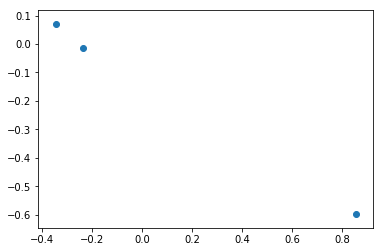

In [147]:
plt.scatter(embedding[:3, 0], embedding[:3, 1])